In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

output_domain_size_dict = {
    "smartgrid-1": (3, 12),
    "smartgrid-2": (9, 12),
    "prob-termination-5": (6, 10),
    "prob-termination-7": (8, 10),
    "prob-termination-6": (7, 10),
    "prob-termination-9": (10, 10),
    "prob-termination-12": (13, 20),
    "window-16": (16, 16),
    "smartgrid-3": (27, 12),
    "reservoir-6": (64, 8),
    "window-20": (20, 20),
    "window-24": (24, 24),
    "window-28": (28, 28),
    "window-32": (32, 32),
    "smartgrid-4": (81, 12),
    "smartgrid-5": (243, 12),
    "reservoir-8": (256, 16),
    "random-walk-14": (500, 40),
    "random-walk-3": (500, 24),
    "random-walk-5": (500, 31),
    "random-walk-7": (500, 33),
    "reservoir-10": (1024, 32),
}

method_order = [
    "empirical",
    "ChaoFON",
    "ChaoFRN",
    "ChaoION",
    "ChaoIRN",
    "miller",
    "ChaoFOM",
    "ChaoFRM",
    "ChaoIOM",
    "ChaoIRM",
    "HyLeak"
]

# Correlation test

In [2]:
corr_data = []
for subject in output_domain_size_dict.keys():
    data_path = f"../result/time-merged-{subject}-i-xy.csv"
    data = pd.read_csv(data_path)
    data_melt = data.melt(
        id_vars=["Nx", "trial"], var_name="method", value_name="time (s)"
    )
    data_melt = data_melt.groupby(["Nx", "method"]).mean().reset_index()
    data_melt = data_melt[data_melt["method"] == "ChaoIRM"]
    num_x = output_domain_size_dict[subject][0]
    num_xy = (
        output_domain_size_dict[subject][0]
        * output_domain_size_dict[subject][1]
    )
    for row in data_melt.iterrows():
        chao_time = row[1]["time (s)"]
        Nx = row[1]["Nx"]
        corr_data.append(
            (chao_time, Nx * output_domain_size_dict[subject][0], num_x, num_xy)
        )
corr_df = pd.DataFrame(
    corr_data, columns=["time", "num_samples", "num_x", "num_xy"]
)
corr_df


,time,num_samples,num_x,num_xy
0,0.113574,18,3,36
1,0.121575,36,3,36
2,0.122509,72,3,36
3,0.067301,180,3,36
4,0.310608,54,9,108
...,...,...,...,...
83,21.029648,82500,500,16500
84,156.770269,16384,1024,32768
85,179.070112,32768,1024,32768
86,232.979417,65536,1024,32768


Pearson correlation


,time,num_samples,num_x,num_xy
time,1.000000,0.667641,0.840675,0.870236
num_samples,0.667641,1.000000,0.709221,0.724846
num_x,0.840675,0.709221,1.000000,0.978437
num_xy,0.870236,0.724846,0.978437,1.000000


y=4.78e-03x+-4.52, r=0.87, p=3.54e-28


Text(0.5, 0.5, 'y=0.00x+-4.52, r=0.87, p=0.00')

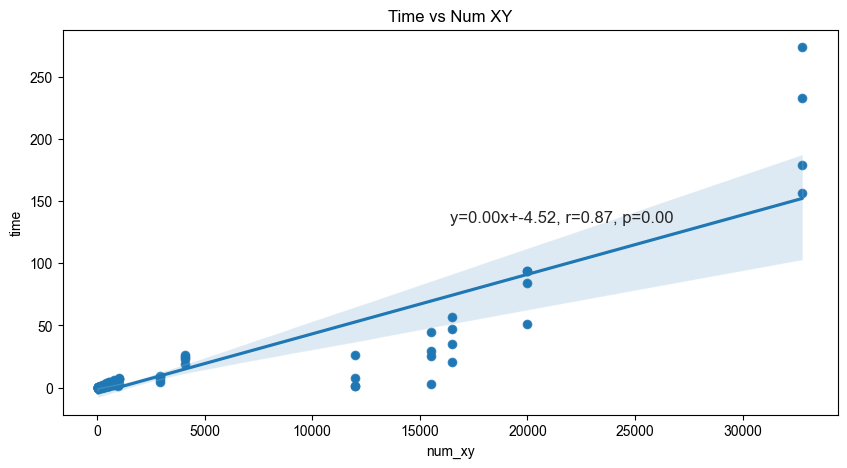

In [3]:
print("Pearson correlation")
display(corr_df.corr(method="pearson"))

fig, ax = plt.subplots(figsize=(10, 5))
sns.set_theme(style="whitegrid")
sns.scatterplot(
    x="num_xy",
    y="time",
    data=corr_df,
    ax=ax,
)
ax.set_xlabel("Num XY")
ax.set_ylabel("Time (s)")
ax.set_title("Time vs Num XY")
slope, intercept, r_value, p_value, std_err = stats.linregress(
    corr_df["num_xy"], corr_df["time"]
)
print(f"y={slope:.2e}x+{intercept:.2f}, r={r_value:.2f}, p={p_value:.2e}")
sns.regplot(
    x="num_xy",
    y="time",
    data=corr_df,
    ax=ax,
    line_kws={
        "label": f"y={slope:.2f}x+{intercept:.2f}, r={r_value:.2f}, p={p_value:.2f}"
    },
)
ax.text(
    0.5,
    0.5,
    f"y={slope:.2f}x+{intercept:.2f}, r={r_value:.2f}, p={p_value:.2f}",
    transform=ax.transAxes,
)


In [4]:
subject_name_map = {
    "smartgrid-1": "SG1",
    "smartgrid-2": "SG2",
    "prob-termination-5": "PT5",
    "prob-termination-7": "PT7",
    "prob-termination-6": "PT6",
    "prob-termination-9": "PT9",
    "prob-termination-12": "PT12",
    "window-16": "WD16",
    "smartgrid-3": "SG3",
    "reservoir-6": "RV6",
    "window-20": "WD20",
    "window-24": "WD24",
    "window-28": "WD28",
    "window-32": "WD32",
    "smartgrid-4": "SG4",
    "smartgrid-5": "SG5",
    "reservoir-8": "RV8",
    "random-walk-14": "RW14",
    "random-walk-3": "RW3",
    "random-walk-5": "RW5",
    "random-walk-7": "RW7",
    "reservoir-10": "RV10",
}

df_list = []

for subject in output_domain_size_dict.keys():
    subject_name = subject_name_map[subject]
    data_path = f"../result/time-merged-{subject}-i-xy.csv"
    data = pd.read_csv(data_path)
    data_melt = data.melt(
        id_vars=["Nx", "trial"], var_name="method", value_name="time (s)"
    )
    method_order_s = method_order.copy()
    data_melt["subject"] = subject_name
    df_list.append(data_melt)
total_df = pd.concat(df_list)
total_df = total_df.set_index(["subject", "Nx"]).drop(columns=["trial"])
total_df = total_df[
    total_df["method"].isin(
        [
            "ChaoFON",
            "ChaoFRN",
            "ChaoION",
            "ChaoIRN",
            "ChaoFOM",
            "ChaoFRM",
            "ChaoIOM",
            "ChaoIRM",
        ]
    )
]
total_df = total_df.groupby(["subject", "Nx", "method"]).mean()
print(total_df.groupby(["method"]).describe())


        time (s)                                                        \
           count        mean         std       min       25%       50%   
method                                                                   
ChaoFOM     88.0   92.925631  225.563862  0.179997  0.757615  4.411405   
ChaoFON     88.0  102.833007  252.181871  0.178759  0.835399  4.840577   
ChaoFRM     88.0  127.018441  336.680513  0.194497  0.865469  5.506200   
ChaoFRN     88.0  127.069982  336.376957  0.190655  0.880067  5.536420   
ChaoIOM     88.0   19.362871   47.885137  0.070930  0.348097  2.309661   
ChaoION     88.0   18.227595   45.300349  0.064766  0.348921  2.245086   
ChaoIRM     88.0   19.225352   47.327991  0.067301  0.364945  2.408412   
ChaoIRN     88.0   19.272810   47.185610  0.070393  0.351350  2.391346   

                                 
               75%          max  
method                           
ChaoFOM  40.082467  1202.091995  
ChaoFON  44.058092  1366.662161  
ChaoFRM  47.511